[nltk_data] Downloading package stopwords to
[nltk_data]     /home/epikaizo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /home/epikaizo/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /home/epikaizo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2025-05-13 04:47:49,212 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2025-05-13 04:47:52,255 : INFO : built Dictionary<46322 unique tokens: ['...next', '3', '80', 'A/C', 'AZ']...> from 5000 documents (total 677854 corpus positions)
2025-05-13 04:47:52,260 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<46322 unique tokens: ['...next', '3', '80', 'A/C', 'AZ']...> from 5000 documents (total 677854 corpus positions)", 'datetime': '2025-05-13T04:47:52.260284', 'gensim': '4.3.3', 'python': '3.11.6 | packaged by conda-forge | (main, Oct  3 2023, 10:40:35) [GCC 12.3.0]', 'platform': '


Nombre optimal de topics (basé sur get_Cv_gensim) : 4
Scores de cohérence (get_Cv_gensim) par nombre de topics :
  2 topics : 0.2691
  3 topics : 0.3625
  4 topics : 0.3780
  5 topics : 0.3623


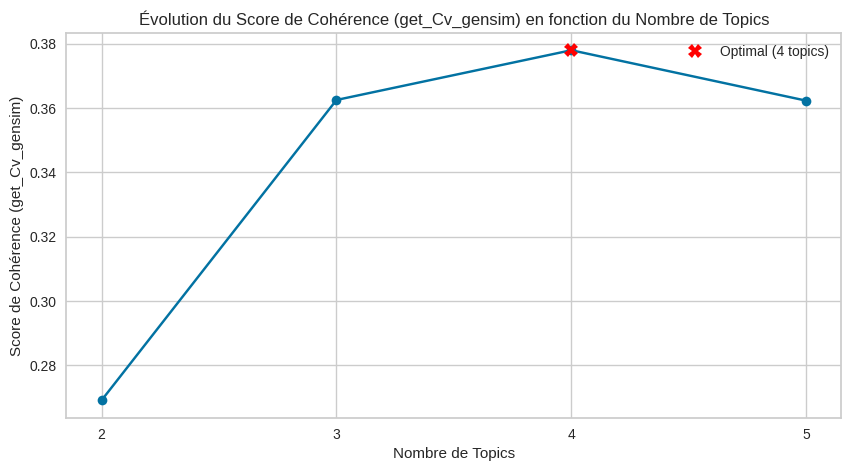

--- Attention : Utilisation de CountVectorizer avec LDA ---
LDA Topics:
Topic 0:
say tell service customer time make day store business phone manager try come know company
Topic 1:
food good order like place chicken taste pizza really eat cheese bad time try sauce
Topic 2:
car like time place room look tell say work come day stay bad leave hotel
Topic 3:
food order come time wait service table say place restaurant bar sit good people make


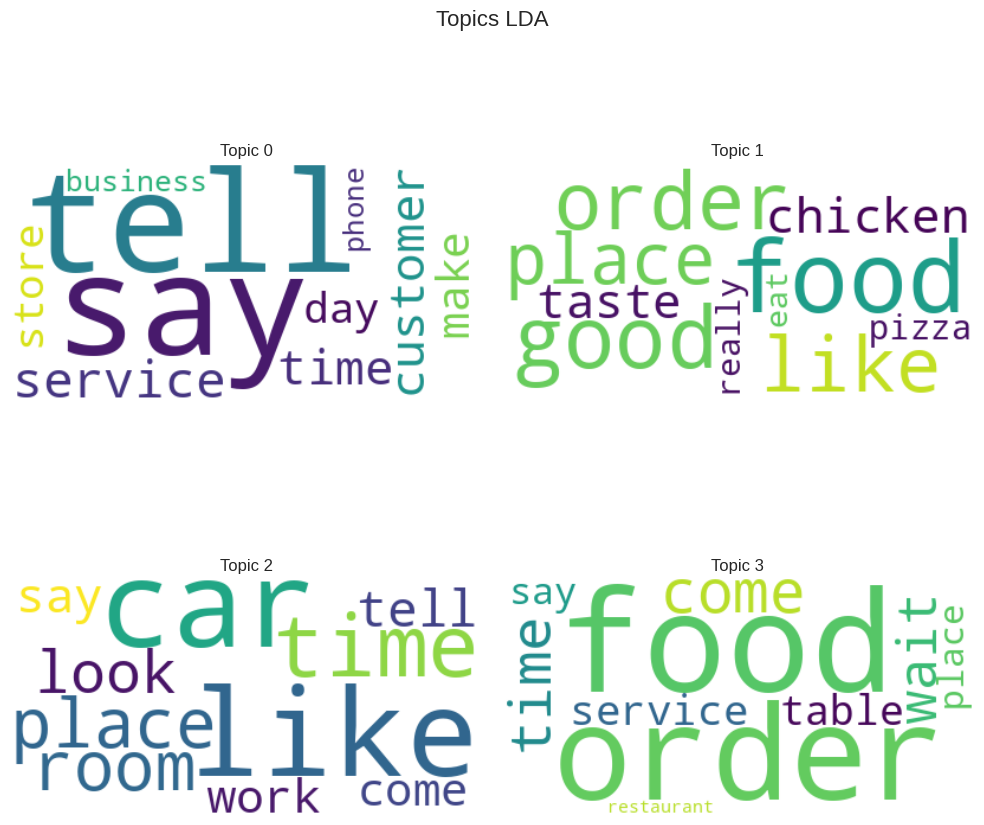

Le topic majoritaire est le sujet 1 avec 1557 documents.
--- Attention : Utilisation de CountVectorizer avec LDA ---
1. Chargement et préparation des données...


/tmp/ipykernel_322342/4024052565.py:628: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Nombre d'échantillons après sous-échantillonnage stratifié : 2500
Distribution des classes après échantillonnage :
label
drink      500
food       500
inside     500
menu       500
outside    500
Name: count, dtype: int64

2. Extraction des caractéristiques avec EfficientNetB0...


Extraction Features:  30%|███       | 759/2500 [05:09<11:09,  2.60it/s]

Avertissement : L'image data/photos/l_rMdwgrvjm2PyHyXBcBTw.jpg (ID: l_rMdwgrvjm2PyHyXBcBTw) n'a pas pu être chargée et sera ignorée.


Extraction Features: 100%|██████████| 2500/2500 [16:31<00:00,  2.52it/s]



2499 caractéristiques extraites avec succès.
Encodage des étiquettes (labels) car elles sont de type chaîne de caractères.
Mappage des étiquettes : {'drink': 0, 'food': 1, 'inside': 2, 'menu': 3, 'outside': 4}

3. Réduction de dimensionnalité avec t-SNE et Visualisation...


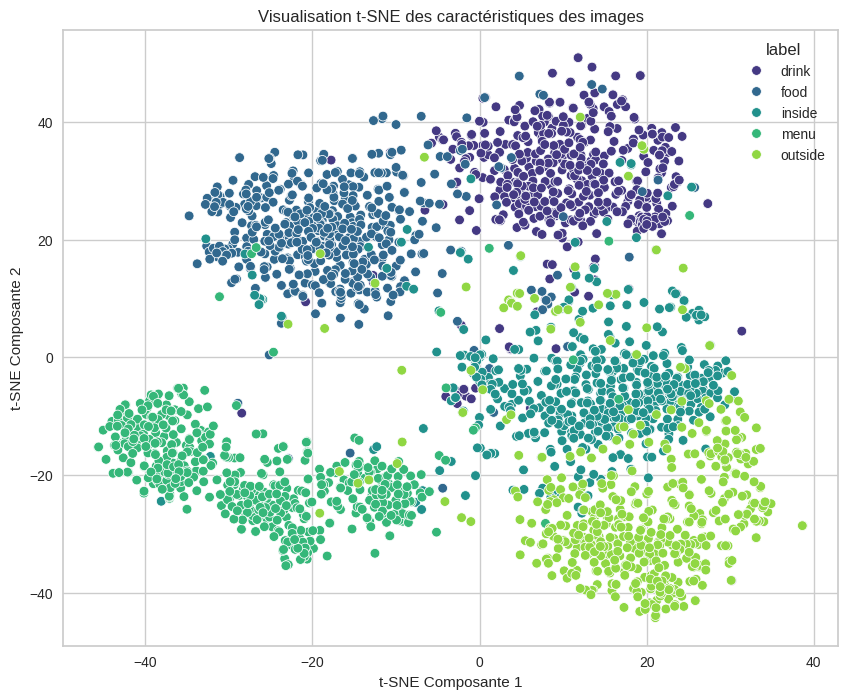

Visualisation t-SNE sauvegardée dans tsne_visualization.png

4. Apprentissage d'un classifieur Random Forest...
Taille de l'ensemble d'entraînement : 1674, Test : 825
Application de la PCA avec 10 composantes...
Variance expliquée par les 10 composantes PCA : 0.25
Recherche des meilleurs hyperparamètres pour RandomForestClassifier...
Meilleurs hyperparamètres trouvés : {'max_depth': 8, 'n_estimators': 100}
Score du classifieur (Random Forest) sur l'ensemble de test : 0.9103

Sauvegarde des modèles et transformateurs entraînés...
Scaler sauvegardé dans scaler.joblib
PCA sauvegardé dans pca.joblib
Modèle RandomForest sauvegardé dans random_forest_model.joblib
LabelEncoder sauvegardé dans label_encoder.joblib
Sauvegarde terminée.
Le topic prédit pour l'image 'data/photos/dummy_new_image.jpg' est : drink

Script terminé.


In [9]:
import numpy as np
import pandas as pd
import random
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
nltk.download('words')
nltk.download('punkt')
import json
import csv
import os
import random
import cv2
import seaborn as sns
import re
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import offsetbox
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet, words
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA
from nltk.stem import WordNetLemmatizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix, classification_report
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import matplotlib.patches as mpatches
from wordcloud import WordCloud
from yellowbrick.text import PosTagVisualizer
import gensim
from gensim.models import CoherenceModel
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.lda_model
from joblib import dump, load  # Import pour la sauvegarde et le chargement des modèles
import logging

logging.basicConfig(
    format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO
)  # Configuration du logging


english_words = set(words.words())
pyLDAvis.enable_notebook()

import os
import cv2
import numpy as np
import pandas as pd  # type: ignore
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from sklearn import manifold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from tqdm import tqdm  # Pour les barres de progression


# =============================
# Définition des Fonctions
# =============================
def get_wordnet_pos(treebank_tag):
    """
    Convertit les étiquettes de parties du discours (Part of Speech, POS) de Penn Treebank au format WordNet.

    Args:
        treebank_tag (str): Étiquette de partie du discours au format Penn Treebank.

    Returns:
        str: Étiquette de partie du discours au format WordNet.
    """
    if treebank_tag.startswith("J"):
        return wordnet.ADJ
    elif treebank_tag.startswith("V"):
        return wordnet.VERB
    elif treebank_tag.startswith("N"):
        return wordnet.NOUN
    elif treebank_tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # by default it is NOUN


def preprocess_text(text, english_words=english_words, min_len_word=3, rejoin=False):
    """
    Pré-traite un texte en réalisant plusieurs opérations : conversion en minuscules, suppression des caractères non
    alphabétiques, élimination des stop words, lemmatisation et filtrage des mots courts.

    Args:
        text (str): Texte à pré-traiter.
        english_words (set): Ensemble des mots anglais à considérer.
        min_len_word (int): Longueur minimale des mots à conserver.
        rejoin (bool): Si True, renvoie le texte pré-traité sous forme d'une chaîne de caractères.

    Returns:
        list or str: Texte pré-traité sous forme d'une liste de mots ou d'une chaîne de caractères (si rejoin=True).
    """
    text = text.lower()
    text = re.sub("[^a-z]", " ", text)
    stop_words = set(stopwords.words("english"))
    words = [word for word in text.split() if word not in stop_words]
    filtered_corpus = [word for word in words if word in english_words]
    lemmatizer = WordNetLemmatizer()
    tagged_words = pos_tag(filtered_corpus)
    words = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tagged_words
    ]
    final_tokens = [w for w in words if len(w) >= min_len_word]
    if rejoin:
        return " ".join(final_tokens)
    return final_tokens


def clean_dataset(doc):
    """
    Nettoie un document en utilisant la fonction preprocess_text avec rejoin=True.

    Args:
        doc (str): Document à nettoyer.

    Returns:
        str: Document nettoyé.
    """
    return preprocess_text(doc, rejoin=True)


def topic_modeling_lda(reviews, num_topics):
    """
    Vectorise (CountVectorizer) et crée le modèle LDA. Retourne modèle, vectorizer, vecteurs de sujet, matrice CountVectorizer.
    """
    print("--- Attention : Utilisation de CountVectorizer avec LDA ---")
    vectorizer = CountVectorizer(
        max_df=0.95, min_df=1, max_features=1000, stop_words="english"
    )
    count_matrix = vectorizer.fit_transform(reviews)

    lda_model = LatentDirichletAllocation(
        n_components=num_topics,
        learning_method="online",
        random_state=0,
        max_iter=10,  # max_iter peut nécessiter ajustement
    )

    if (
        count_matrix.shape[0] == 0 or count_matrix.shape[1] == 0
    ):  # Gestion matrice vide
        print(
            "Attention : La matrice CountVectorizer est vide après vectorisation. LDA ne peut pas être entraîné."
        )
        return None, vectorizer, np.array([]), count_matrix

    lda_model.fit(count_matrix)
    topic_vectors = lda_model.transform(count_matrix)
    return lda_model, vectorizer, topic_vectors, count_matrix



def display_topics(model, vectorizer, no_top_words=15):
    """
    Affiche les principaux mots pour chaque sujet généré par un modèle LDA.

    Args:
        model (LatentDirichletAllocation): Modèle LDA.
        vectorizer (CountVectorizer): Vectorizer utilisé pour transformer le corpus.
        no_top_words (int): Nombre de principaux mots à afficher pour chaque sujet.

    Returns:
        list of str: Liste de tous les mots uniques présents dans le corpus utilisés par le vectorizer.
    """
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(
            " ".join(
                [feature_names[i] for i in topic.argsort()[: -no_top_words - 1 : -1]]
            )
        )
    return feature_names



def get_Cv_gensim(model, texts, dictionary, coherence_type="c_v"):
    """
    Calcule et renvoie le score de cohérence pour un modèle LDA Gensim.
    """
    if not texts or not dictionary or not model:
        logging.error(
            "Modèle, Textes ou Dictionnaire manquant pour le calcul de cohérence."
        )
        return None
    try:
        coherence_model = CoherenceModel(
            model=model, texts=texts, dictionary=dictionary, coherence=coherence_type
        )
        coherence = coherence_model.get_coherence()
        return coherence
    except Exception as e:
        logging.error(
            f"Erreur lors du calcul de la cohérence ({coherence_type}) dans get_Cv_gensim: {e}"
        )
        return None



def find_optimal_number_of_topics(
    dictionary,
    corpus,
    texts,
    limit,
    start=2,
    step=3,
    random_state=100,
    passes=10,
    iterations=50,
    chunksize=100,
):
    """
    Calcule les scores de cohérence en utilisant get_Cv_gensim pour différents nombres de topics
    et retourne le nombre de topics optimal.
    """
    coherence_values = []
    model_list = []
    topic_numbers = list(range(start, limit, step))

    if not topic_numbers:
        logging.warning(
            f"La plage de topics spécifiée (start={start}, limit={limit}, step={step}) est vide."
        )
        return None, {}

    logging.info(
        f"Début du calcul de cohérence (via get_Cv_gensim) pour {len(topic_numbers)} modèles (topics de {start} à {limit-1} par pas de {step})..."
    )

    for num_topics in topic_numbers:
        try:
            model = gensim.models.ldamodel.LdaModel(
                corpus=corpus,
                id2word=dictionary,  # Utilise le dictionnaire Gensim
                num_topics=num_topics,
                random_state=random_state,
                update_every=1,
                chunksize=chunksize,
                passes=passes,
                iterations=iterations,
                alpha="auto",
                eta="auto",
                per_word_topics=True,
            )
            model_list.append(model)
            logging.debug(f"Appel de get_Cv_gensim pour {num_topics} topics...")
            coherence = get_Cv_gensim(
                model=model, texts=texts, dictionary=dictionary
            )  # Appel de la fonction adaptée

            if coherence is not None:
                coherence_values.append(coherence)
                logging.info(
                    f"Nombre de Topics = {num_topics} -> Score de Cohérence (get_Cv_gensim) = {coherence:.4f}"
                )
            else:
                logging.warning(
                    f"get_Cv_gensim a retourné None pour {num_topics} topics. Ce point sera ignoré."
                )
                coherence_values.append(None)

        except Exception as e:
            logging.error(
                f"Erreur lors de l'entraînement ou du calcul de cohérence pour {num_topics} topics: {e}"
            )
            coherence_values.append(None)

    valid_scores = [
        (topic_numbers[i], score) for i, score in enumerate(coherence_values) if score is not None
    ]

    if not valid_scores:
        logging.warning(
            "Aucun score de cohérence n'a pu être calculé avec succès via get_Cv_gensim."
        )
        return None, {}

    optimal_num_topics, max_coherence = max(valid_scores, key=lambda item: item[1])
    coherence_scores_dict = dict(valid_scores)

    logging.info(
        f"Calcul terminé. Nombre optimal de topics trouvé : {optimal_num_topics} (Score get_Cv_gensim = {max_coherence:.4f})"
    )

    return optimal_num_topics, coherence_scores_dict



def plot_wordcloud(lda_model, lda_features_names, num_topics):
    """
    Affiche une visualisation de nuage de mots pour chaque sujet d'un modèle LDA.
    """
    fig, axes = plt.subplots(int(num_topics / 2), 2, figsize=(10, 10))
    for i in range(num_topics):
        topic_words = lda_model.components_[i]
        top_word_indices = topic_words.argsort()[:-11:-1]
        wc_dict = {
            lda_features_names[index]: topic_words[index] for index in top_word_indices
        }
        wc = WordCloud(background_color="white")
        wc.generate_from_frequencies(wc_dict)
        ax = axes[i // 2, i % 2]
        ax.set_title(f"Topic {i}")
        ax.imshow(wc, interpolation="bilinear")
        ax.axis("off")
    plt.tight_layout()
    plt.suptitle("Topics LDA", fontsize=16)
    plt.show()



def plot_tsne(topic_vectors, num_topics):
    """
    Affiche une visualisation t-SNE des sujets d'un modèle LDA.
    """
    dominant_topics = np.argmax(topic_vectors, axis=1)
    tsne_model = TSNE(n_components=2, random_state=0)
    tsne_vectors = tsne_model.fit_transform(topic_vectors)
    df = pd.DataFrame(tsne_vectors, columns=["x", "y"])
    df["dominant_topic"] = dominant_topics.astype(
        str
    )  # Convertir les labels en string pour Plotly
    colors = px.colors.qualitative.Set1
    color_map = {str(i): colors[i] for i in range(num_topics)}
    fig = px.scatter(
        df,
        x="x",
        y="y",
        color="dominant_topic",
        color_discrete_map=color_map,
        title="Visualisation t-SNE des sujets de modélisation LDA",
        labels={"dominant_topic": "Sujet Dominant"},
        hover_name=df.index,
        template="plotly_white",
    )
    fig.update_traces(marker=dict(size=6, opacity=0.7), selector=dict(mode="markers"))
    fig.update_layout(legend_title_text="Topics")
    fig.show()
    return dominant_topics



def count_maj_topic(dominant_topics):
    """
    Compte le nombre de documents attribués à chaque sujet et imprime le sujet le plus courant.

    Args:
        dominant_topics (numpy.ndarray): Tableau indiquant le sujet dominant pour chaque document.

    Returns:
        None. Cette fonction imprime directement le sujet le plus courant et son nombre de documents.
    """
    topic_counts = Counter(dominant_topics)
    major_topic = topic_counts.most_common(1)[0]
    print(
        f"Le topic majoritaire est le sujet {major_topic[0]} avec {major_topic[1]} documents."
    )



class TextPreprocessor(BaseEstimator, TransformerMixin):
    """
    Un transformateur personnalisé qui effectue un prétraitement sur du texte.
    """

    def __init__(self, english_words, min_len_word=3, rejoin=True):
        self.english_words = english_words
        self.min_len_word = min_len_word
        self.rejoin = rejoin

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [
            preprocess_text(doc, self.english_words, self.min_len_word, self.rejoin)
            for doc in X
        ]



class TopicModeler(BaseEstimator, TransformerMixin):
    """
    Un transformateur personnalisé qui effectue une modélisation de sujet LDA sur du texte prétraité.
    """

    def __init__(self, num_topics=4):
        self.num_topics = num_topics

    def fit(self, X, y=None):
        (
            self.lda_model,
            self.count_vectorizer,
            self.topic_vectors,
            self.dtm,
        ) = topic_modeling_lda(X, self.num_topics)
        return self

    def transform(self, X):
        return self.lda_model.transform(self.count_vectorizer.transform(X))


# =============================
# Chargement des données
# =============================
negative_reviews = pd.read_csv("negative_reviews5000.csv")
data = negative_reviews.copy()
negative_reviews["cleaned_text"] = negative_reviews["text"].apply(clean_dataset)
raw_corpus = " ".join(negative_reviews.text.values)
corpus = preprocess_text(raw_corpus)
tmp = pd.Series(corpus).value_counts()
rare_words = tmp[tmp <= 5]
list_rare_words = rare_words.index.to_list()
tmp = pd.DataFrame({"words": rare_words})
tmp.to_csv("rare_words.csv", index=False)


# =============================
# Modélisation des sujets (LDA)
# =============================
tokenized_texts = [
    text.split() for text in negative_reviews["text"]
]  # Utiliser text directement
dictionary = gensim.corpora.Dictionary(
    tokenized_texts
)  # Passer la liste tokenisée
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

start_topics = 2
limit_topics = 6
step_topics = 1
optimal_topics, coherence_scores = find_optimal_number_of_topics(
    dictionary=dictionary,
    corpus=corpus,
    texts=tokenized_texts,  # Passer la liste tokenisée
    limit=limit_topics,
    start=start_topics,
    step=step_topics,
    passes=5,
    iterations=30,
)

if optimal_topics is not None:
    print(f"\nNombre optimal de topics (basé sur get_Cv_gensim) : {optimal_topics}")
    print("Scores de cohérence (get_Cv_gensim) par nombre de topics :")
    for topics, score in coherence_scores.items():
        print(f"  {topics} topics : {score:.4f}")
    try:
        import matplotlib.pyplot as plt

        x = list(coherence_scores.keys())
        y = list(coherence_scores.values())
        plt.figure(figsize=(10, 5))
        plt.plot(x, y, marker="o")
        plt.xlabel("Nombre de Topics")
        plt.ylabel("Score de Cohérence (get_Cv_gensim)")
        plt.title(
            "Évolution du Score de Cohérence (get_Cv_gensim) en fonction du Nombre de Topics"
        )
        plt.xticks(x)
        plt.grid(True)
        if optimal_topics in coherence_scores:
            plt.plot(
                optimal_topics,
                coherence_scores[optimal_topics],
                marker="X",
                color="red",
                markersize=10,
                linestyle="None",
                label=f"Optimal ({optimal_topics} topics)",
            )
        plt.legend()
        plt.show()
    except ImportError:
        print(
            "\nMatplotlib non trouvé. Installez-le (`pip install matplotlib`) pour visualiser les scores."
        )
    except Exception as e:
        print(f"\nErreur lors de la création du graphique : {e}")
else:
    print(
        "\nImpossible de déterminer le nombre optimal de topics avec les paramètres fournis (en utilisant get_Cv_gensim)."
    )
num_topics = optimal_topics  # Utilisez la valeur optimale
preprocessed_reviews = [review for review in negative_reviews.cleaned_text.values]
lda_model, count_vectorizer, topic_vectors, dtm = topic_modeling_lda(
    preprocessed_reviews, num_topics=optimal_topics
)  # Utilisez la valeur optimale
print("LDA Topics:")
lda_features_names = display_topics(lda_model, count_vectorizer)

# =============================
# Visualisation
# =============================
plot_wordcloud(lda_model, lda_features_names, num_topics)
pyLDAvis.lda_model.prepare(lda_model, dtm, count_vectorizer, mds="mmds")
dominant_topics = plot_tsne(topic_vectors, num_topics)
count_maj_topic(dominant_topics)


# =============================
# Pipeline et prédiction
# =============================
text_pipeline = Pipeline(
    [
        (
            "preprocessing",
            TextPreprocessor(english_words=english_words, min_len_word=3, rejoin=True),
        ),
        ("topic_modeling", TopicModeler(num_topics=num_topics)),  # Utilisez la valeur optimale
    ]
)
transformed_data = text_pipeline.fit_transform(negative_reviews["text"])


def topic_predict(texte_unique_raw, text_pipeline_obj=text_pipeline):
    """
    Prédit le topic d'un texte unique en utilisant le pipeline fourni.

    Args:
        texte_unique_raw (str): Le texte à prédire.
        text_pipeline_obj: le pipeline de traitement de texte

    Returns:
        None. Affiche les informations sur le topic prédit.
    """
    review0_iterable = [texte_unique_raw]
    print(f"\nPrédiction du topic pour le texte : '{texte_unique_raw}'")
    try:
        topic_distribution = text_pipeline_obj.transform(
            review0_iterable
        )  # Utilisez l'objet pipeline passé en argument
        numero_topic_predit = np.argmax(topic_distribution, axis=1)[0]
        print(f"Distribution de probabilité : {topic_distribution[0]}")
        print(f"Le numéro du topic prédit (0 à {num_topics-1}) est : {numero_topic_predit}")  # Utilisez num_topics
        if (
            hasattr(text_pipeline_obj.named_steps["topic_modeling"], "lda_model")
            and text_pipeline_obj.named_steps["topic_modeling"].lda_model is not None
        ):
            print("\n--- Mots clés par topic (appris lors du fit) ---")
            vectorizer = text_pipeline_obj.named_steps["topic_modeling"].count_vectorizer
            lda_model = text_pipeline_obj.named_steps["topic_modeling"].lda_model
            feature_names = vectorizer.get_feature_names_out()
            n_top_words = 7
            for topic_idx, topic_loadings in enumerate(lda_model.components_):
                top_words_indices = topic_loadings.argsort()[:-n_top_words - 1 : -1]
                top_words = [feature_names[i] for i in top_words_indices]
                print(f"Topic {topic_idx}: {', '.join(top_words)}")
        else:
            print("\nImpossible d'afficher les mots clés (modèle non entraîné correctement).")
    except Exception as e:
        print(f"Erreur pendant la transformation/prédiction : {e}")



# ============Images ====================================


# --- Constantes de configuration ---
PHOTOS_JSON_PATH = 'data/photos.json'
PHOTOS_DIR_PATH = 'data/photos/'
N_SAMPLES_PER_CLASS = 500 # Nombre d'échantillons par classe pour le sous-échantillonnage
TARGET_COLUMN = 'label' # Nom de la colonne contenant les étiquettes
EFFICIENTNET_INPUT_SIZE = (224, 224) # Taille d'entrée attendue par EfficientNetB0
PCA_N_COMPONENTS = 10
TEST_SIZE_SPLIT = 0.33
RANDOM_STATE_GLOBAL = 42

# Paths for saving/loading models (utilisés aussi par l'app Streamlit)
SCALER_PATH = 'scaler.joblib'
PCA_PATH = 'pca.joblib'
MODEL_PATH = 'random_forest_model.joblib'
LABEL_ENCODER_PATH = 'label_encoder.joblib'
TSNE_PLOT_IMAGE_PATH = 'tsne_visualization.png' # Chemin pour l'image du graphique t-SNE


# --- 1. Chargement et préparation des données ---
print("1. Chargement et préparation des données...")

def load_data_from_jsonl(file_path):
    """Charge les données depuis un fichier JSON Lines."""
    data_list = []
    try:
        with open(file_path, 'r') as f:
            for line in f:
                data_list.append(json.loads(line))
    except FileNotFoundError:
        print(f"Erreur : Le fichier {file_path} n'a pas été trouvé.")
        return pd.DataFrame() # Retourne un DataFrame vide en cas d'erreur
    return pd.DataFrame(data_list)

df_full = load_data_from_jsonl(PHOTOS_JSON_PATH)

if df_full.empty:
    print("Aucune donnée chargée. Arrêt du script.")
    exit()

def stratified_sample_df(df: pd.DataFrame, col: str, n_samples: int) -> pd.DataFrame:
    """
    Effectue un échantillonnage stratifié sur un DataFrame.
    S'assure que chaque classe a au moins n_samples, sinon prend le minimum disponible.
    """
    min_samples_in_any_class = df[col].value_counts().min()
    actual_n_samples = min(n_samples, min_samples_in_any_class)
    if actual_n_samples < n_samples:
        print(f"Avertissement : Le nombre d'échantillons demandé ({n_samples}) est supérieur au nombre "
              f"d'échantillons disponibles dans la plus petite classe ({min_samples_in_any_class}). "
              f"Utilisation de {actual_n_samples} échantillons par classe.")
    
    df_sampled = df.groupby(col, group_keys=False).apply(lambda x: x.sample(n=actual_n_samples, random_state=RANDOM_STATE_GLOBAL))
    return df_sampled.reset_index(drop=True)

subsampled_df = stratified_sample_df(df_full, TARGET_COLUMN, N_SAMPLES_PER_CLASS)
print(f"Nombre d'échantillons après sous-échantillonnage stratifié : {len(subsampled_df)}")
print(f"Distribution des classes après échantillonnage :\n{subsampled_df[TARGET_COLUMN].value_counts()}")

# --- 2. Extraction des caractéristiques (Features) ---
print("\n2. Extraction des caractéristiques avec EfficientNetB0...")

# Chargement du modèle pré-entraîné EfficientNetB0 pour l'extraction de caractéristiques
feature_extractor = EfficientNetB0(include_top=False, weights='imagenet', pooling='avg')

processed_photo_ids = []
processed_features_X = []
processed_labels_y = []

for index, row in tqdm(subsampled_df.iterrows(), total=subsampled_df.shape[0], desc="Extraction Features"):
    photo_id = row['photo_id']
    label = row[TARGET_COLUMN]
    
    image_path = os.path.join(PHOTOS_DIR_PATH, photo_id + '.jpg')
    image_array = cv2.imread(image_path)

    if image_array is None:
        print(f"Avertissement : L'image {image_path} (ID: {photo_id}) n'a pas pu être chargée et sera ignorée.")
        continue

    try:
        # Prétraitement de l'image pour EfficientNetB0
        img_rgb = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB) # EfficientNet attend du RGB
        img_resized = cv2.resize(img_rgb, EFFICIENTNET_INPUT_SIZE)
        img_expanded = np.expand_dims(img_resized, axis=0) # Ajoute la dimension du batch
        img_preprocessed = preprocess_input(img_expanded) # Prétraitement spécifique à EfficientNet
        
        feature_vector = feature_extractor.predict(img_preprocessed, verbose=0)[0] # verbose=0 pour éviter les logs Keras par image
        
        processed_photo_ids.append(photo_id)
        processed_features_X.append(feature_vector)
        processed_labels_y.append(label)
    except Exception as e:
        print(f"Erreur lors de l'extraction des caractéristiques pour {photo_id}: {e}. L'image sera ignorée.")
        continue

if not processed_features_X:
    print("Erreur critique : Aucune caractéristique n'a été extraite avec succès. Le script va s'arrêter.")
    exit(1)



# Conversion en tableaux NumPy pour scikit-learn
features_X_np = np.stack(processed_features_X)
labels_y_np = np.array(processed_labels_y) # Les étiquettes correspondant aux features extraites
print(f"\n{len(features_X_np)} caractéristiques extraites avec succès.")

joblib.dump(processed_features_X,"processed_features_X.joblib")
joblib.dump(processed_labels_y,"processed_labels_y.joblib")
joblib.dump(features_X_np,"features_X_np.joblib")
joblib.dump(labels_y_np,"labels_y_np.joblib")


# Initialisation du LabelEncoder. Il sera ajusté si les étiquettes sont des chaînes.
label_encoder = None
# Encodage des étiquettes si elles sont de type chaîne de caractères, pour les opérations numériques comme bincount
if labels_y_np.ndim > 0 and labels_y_np.dtype.kind in ['O', 'S', 'U']: # 'O' pour object, 'S' pour bytes, 'U' pour Unicode
    print("Encodage des étiquettes (labels) car elles sont de type chaîne de caractères.")
    label_encoder = LabelEncoder()
    labels_y_for_model = label_encoder.fit_transform(labels_y_np)
    label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"Mappage des étiquettes : {label_mapping}")
else:
    labels_y_for_model = labels_y_np # Supposons qu'elles sont déjà numériques ou ont été encodées précédemment

# --- 3. Réduction de dimensionnalité avec t-SNE et Visualisation ---
print("\n3. Réduction de dimensionnalité avec t-SNE et Visualisation...")
# Ajustement de la perplexité pour t-SNE si le nombre d'échantillons est faible
perplexity_value = min(30, len(features_X_np) - 1) if len(features_X_np) > 1 else 5
tsne = manifold.TSNE(n_components=2, init='pca', random_state=RANDOM_STATE_GLOBAL, perplexity=perplexity_value)
X_tsne = tsne.fit_transform(features_X_np)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels_y_np, palette="viridis") # Utilisation des labels_y_np (originaux, chaînes si c'est le cas) pour une légende claire
plt.title('Visualisation t-SNE des caractéristiques des images')
plt.xlabel('t-SNE Composante 1')
plt.ylabel('t-SNE Composante 2')
plt.legend(title=TARGET_COLUMN)
plt.show()

plt.savefig(TSNE_PLOT_IMAGE_PATH) # Sauvegarde de la figure
plt.close() # Ferme la figure pour libérer la mémoire
print(f"Visualisation t-SNE sauvegardée dans {TSNE_PLOT_IMAGE_PATH}")

# --- 4. Apprentissage d'un classifieur ---
print("\n4. Apprentissage d'un classifieur Random Forest...")

# Division des données (en utilisant les features et labels correctement alignés)
X_train, X_test, y_train, y_test = train_test_split(
    features_X_np, labels_y_for_model, # Utilisation des étiquettes encodées numériquement
    test_size=TEST_SIZE_SPLIT,
    random_state=RANDOM_STATE_GLOBAL,
    stratify=labels_y_for_model # Stratification basée sur les étiquettes encodées
)

print(f"Taille de l'ensemble d'entraînement : {X_train.shape[0]}, Test : {X_test.shape[0]}")

# Standardisation des données
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Réduction de dimensionnalité avec PCA
print(f"Application de la PCA avec {PCA_N_COMPONENTS} composantes...")
# S'assurer que n_components <= nombre de features et <= nombre d'échantillons
actual_pca_n_components = min(PCA_N_COMPONENTS, X_train_std.shape[1], X_train_std.shape[0])
if actual_pca_n_components < 1: actual_pca_n_components = 1 # Doit être au moins 1
pca = PCA(n_components=actual_pca_n_components) 
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print(f"Variance expliquée par les {pca.n_components_} composantes PCA : {np.sum(pca.explained_variance_ratio_):.2f}")

# Recherche des meilleurs hyperparamètres pour RandomForestClassifier avec GridSearchCV
print("Recherche des meilleurs hyperparamètres pour RandomForestClassifier...")
params_rf = {'max_depth': range(5, 20, 3), 'n_estimators': [100, 200, 300]}
rf_classifier_model = RandomForestClassifier(random_state=RANDOM_STATE_GLOBAL)

# Ajustement de cv pour GridSearchCV
cv_folds = 3 # Valeur par défaut
if len(np.unique(y_train)) > 1 and len(y_train) > 0: # Nécessaire pour bincount et pour éviter les erreurs
    min_samples_per_class_train = np.min(np.bincount(y_train))
    cv_folds = min(cv_folds, min_samples_per_class_train)
if cv_folds < 2: cv_folds = 2 # cv doit être au moins 2 pour la plupart des stratégies
if X_train_pca.shape[0] < cv_folds : cv_folds = X_train_pca.shape[0] # Cas de LeaveOneOut implicite

grid_search_clf = GridSearchCV(rf_classifier_model, params_rf, cv=cv_folds, scoring='accuracy')
grid_search_clf.fit(X_train_pca, y_train)

print(f"Meilleurs hyperparamètres trouvés : {grid_search_clf.best_params_}")

# Évaluation du meilleur modèle
best_rf_model = grid_search_clf.best_estimator_
score = best_rf_model.score(X_test_pca, y_test)
print(f"Score du classifieur (Random Forest) sur l'ensemble de test : {score:.4f}")

# --- Sauvegarde des modèles et transformateurs entraînés ---
print("\nSauvegarde des modèles et transformateurs entraînés...")
import joblib
try:
    joblib.dump(scaler, SCALER_PATH)
    print(f"Scaler sauvegardé dans {SCALER_PATH}")
    joblib.dump(pca, PCA_PATH)
    print(f"PCA sauvegardé dans {PCA_PATH}")
    joblib.dump(best_rf_model, MODEL_PATH)
    print(f"Modèle RandomForest sauvegardé dans {MODEL_PATH}")
    if label_encoder: # label_encoder est défini globalement et peut être None
        joblib.dump(label_encoder, LABEL_ENCODER_PATH)
        print(f"LabelEncoder sauvegardé dans {LABEL_ENCODER_PATH}")
    print("Sauvegarde terminée.")
except Exception as e:
    print(f"Erreur lors de la sauvegarde des modèles : {e}")
# Les poids du feature_extractor (EfficientNet) sont déjà gérés par Keras ('imagenet'),
# mais si vous l'aviez fine-tuné, vous auriez sauvegardé ses poids aussi.

# --- 5. Pipeline de Prédiction pour une Nouvelle Image ---
def predict_image_topic(image_path: str, feature_extractor_model, scaler_obj, pca_obj, classifier_model, label_encoder_obj=None):
    """
    Prédit le topic d'une nouvelle image en utilisant le pipeline entraîné.

    Args:
        image_path (str): Chemin vers la nouvelle image.
        feature_extractor_model: Le modèle d'extraction de caractéristiques (ex: EfficientNetB0).
        scaler_obj: L'objet StandardScaler ajusté.
        pca_obj: L'objet PCA ajusté.
        classifier_model: Le modèle de classification entraîné (ex: RandomForest).
        label_encoder_obj (LabelEncoder, optional): L'objet LabelEncoder ajusté si les étiquettes ont été encodées.
                                                    Defaults to None.

    Returns:
        str: Le topic prédit (étiquette textuelle si label_encoder_obj est fourni, sinon étiquette numérique).
             None si une erreur se produit.
    """
    try:
        image_array = cv2.imread(image_path)
        if image_array is None:
            print(f"Erreur : Impossible de charger l'image depuis {image_path}")
            return None

        # Prétraitement de l'image (identique à celui de l'entraînement)
        img_rgb = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img_rgb, EFFICIENTNET_INPUT_SIZE)
        img_expanded = np.expand_dims(img_resized, axis=0)
        img_preprocessed = preprocess_input(img_expanded) # preprocess_input de Keras

        # 1. Extraction des caractéristiques
        features_new_image = feature_extractor_model.predict(img_preprocessed, verbose=0)[0]
        features_new_image_reshaped = features_new_image.reshape(1, -1) # Pour scaler et pca

        # 2. Standardisation
        features_new_image_std = scaler_obj.transform(features_new_image_reshaped)

        # 3. Transformation PCA
        features_new_image_pca = pca_obj.transform(features_new_image_std)

        # 4. Prédiction
        prediction_numeric = classifier_model.predict(features_new_image_pca)[0]

        # 5. Décodage de l'étiquette (si un encodeur a été utilisé)
        if label_encoder_obj and hasattr(label_encoder_obj, 'classes_'): # Vérifie si l'encodeur a été ajusté
            return label_encoder_obj.inverse_transform([prediction_numeric])[0]
        else:
            return str(prediction_numeric) # Retourne la prédiction numérique comme chaîne si pas d'encodeur ou non ajusté

    except Exception as e:
        print(f"Erreur lors de la prédiction pour l'image {image_path}: {e}")
        return None

# Exemple d'utilisation du pipeline de prédiction :
# Créez un fichier image factice pour tester si vous n'en avez pas un sous la main
dummy_new_image_path = "data/photos/dummy_new_image.jpg"
if not os.path.exists(PHOTOS_DIR_PATH):
    os.makedirs(PHOTOS_DIR_PATH, exist_ok=True)
    print(f"Création du répertoire : {PHOTOS_DIR_PATH} pour l'image factice.")

if not os.path.exists(dummy_new_image_path):
    # Essayons de copier une image existante si possible, sinon créer une image noire
    if processed_photo_ids: 
        try:
            first_processed_image_path = os.path.join(PHOTOS_DIR_PATH, processed_photo_ids[0] + '.jpg')
            if os.path.exists(first_processed_image_path) and not os.path.exists(dummy_new_image_path):
                import shutil
                shutil.copy(first_processed_image_path, dummy_new_image_path)
                print(f"Image factice copiée pour test : {dummy_new_image_path} (copie de {processed_photo_ids[0]}.jpg)")
        except Exception as e_copy:
            print(f"N'a pas pu copier une image existante pour le test: {e_copy}")
    
    if not os.path.exists(dummy_new_image_path): # Si la copie a échoué ou pas d'images traitées
        cv2.imwrite(dummy_new_image_path, np.zeros((EFFICIENTNET_INPUT_SIZE[0], EFFICIENTNET_INPUT_SIZE[1], 3), dtype=np.uint8))
        print(f"Image factice noire créée pour test : {dummy_new_image_path}")

if os.path.exists(dummy_new_image_path):
    predicted_topic = predict_image_topic(dummy_new_image_path,
                                          feature_extractor,
                                          scaler,
                                          pca,
                                          best_rf_model,
                                          label_encoder_obj=label_encoder) # Utilisez l'objet label_encoder (peut être None)

    if predicted_topic:
        print(f"Le topic prédit pour l'image '{dummy_new_image_path}' est : {predicted_topic}")
else:
    print(f"L'image de test {dummy_new_image_path} n'a pas pu être trouvée ou créée. Test de prédiction ignoré.")

#== TODO pour la production : Sauvegarder les modèles et les transformateurs entraînés
import joblib
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(pca, 'pca.joblib')
joblib.dump(best_rf_model, 'random_forest_model.joblib')
if label_encoder: joblib.dump(label_encoder, 'label_encoder.joblib')

print("\nScript terminé.")
